# Multi-Task Learning for Computer Vision Classification with Keras

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Load CIFAR10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
print('Shape of CIFAR10 dataset: \n', )
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Get number of instances for each class

airplane_count = 0
automobile_count = 0
bird_count = 0
cat_count = 0
deer_count = 0
dog_count = 0
frog_count = 0
horse_count = 0
ship_count = 0
truck_count = 0

for sample in y_train:
    if sample == 0:
        airplane_count += 1
    elif sample == 1:
        automobile_count += 1
    elif sample == 2:
        bird_count += 1
    elif sample == 3:
        cat_count += 1
    elif sample == 4:
        deer_count += 1
    elif sample == 5:
        dog_count += 1
    elif sample == 6:
        frog_count += 1
    elif sample == 7:
        horse_count += 1
    elif sample == 8:
        ship_count += 1
    elif sample == 9:
        truck_count += 1
        
print('\n')
print(f'Number of samples of the class airplane: {airplane_count}')
print(f'Number of samples of the class automobile: {automobile_count}')
print(f'Number of samples of the class bird: {bird_count}')
print(f'Number of samples of the class cat: {cat_count}')
print(f'Number of samples of the class deer: {deer_count}')
print(f'Number of samples of the class dog: {dog_count}')
print(f'Number of samples of the class frog: {frog_count}')
print(f'Number of samples of the class horse: {horse_count}')
print(f'Number of samples of the class ship: {ship_count}')
print(f'Number of samples of the class truck: {truck_count}')

print('\nThe dataset is completely balanced')


Shape of CIFAR10 dataset: 

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


Number of samples of the class airplane: 5000
Number of samples of the class automobile: 5000
Number of samples of the class bird: 5000
Number of samples of the class cat: 5000
Number of samples of the class deer: 5000
Number of samples of the class dog: 5000
Number of samples of the class frog: 5000
Number of samples of the class horse: 5000
Number of samples of the class ship: 5000
Number of samples of the class truck: 5000

The dataset is completely balanced


## Define required functions

In [4]:
def erase_classes(classes_to_drop, x_train, x_test, y_train, y_test):
    """
    :param classes_to_drop: list with the labels of the classes to be erased
    :return: datasets tuple without the classes: (
    """
    new_x_train, new_x_test, new_y_train,  new_y_test = list(), list(), list(), list()
    for train_sample, label in zip(x_train, y_train):
        if label not in classes_to_drop:
            new_x_train.append(train_sample)
            new_y_train.append(label)

    for test_sample, test_label in zip(x_test, y_test):
        if test_label not in classes_to_drop:
            new_x_test.append(test_sample)
            new_y_test.append(test_label)

    return np.array(new_x_train), np.array(new_x_test), np.array(new_y_train), np.array(new_y_test)

In [5]:
def generate_binary_labels(y_train, y_test, animal_classes):
    """
    :param y_train: training labels
    :param y_test: testing labels
    :param animal_classes: list of the labels which correspond to an animal
    :return: training and testing labels for binary classification, where
    animals' label is 0 and vehicle's label is 1
    """
    y_train_2 = [0 if y in animal_classes else 1 for y in y_train]
    y_test_2 = [0 if y in animal_classes else 1 for y in y_test]

    return y_train_2, y_test_2

## Preprocess data

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import keras.datasets.fashion_mnist as fashion_mnist

def preprocess_data_cifar10(x_train, y_train_1, x_test, y_test_1):
    
    new_x_train = list()
    new_y_train = list()
    new_x_test = list()
    new_y_test = list()
    airplane_count, automobile_count, bird_count, cat_count, deer_count, dog_count, frog_count, horse_count, ship_count, truck_count = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    
    
    # First, samples of two classes of animals (deer and horse) are erased from data. This is done because the second task to 
    # be performed is classifying between animals and vehicles. This way, the dataset will be balanced for both tasks
    x_train, x_test, y_train_1, y_test_1 = erase_classes([4, 7], x_train, x_test, y_train_1, y_test_1)
    
    # Make all labels go from 0 to 7 (right now the unique values of y are [0 1 2 3 5 6 8 9], but we want [0 1 2 3 4 5 6 7])
    new_y_train_1 = list()
    for train_label in y_train_1:
        if train_label == 5:
            new_y_train_1.append(4)
        elif train_label == 6:
            new_y_train_1.append(5)
        elif train_label == 8:
            new_y_train_1.append(6)
        elif train_label == 9:
            new_y_train_1.append(7)
        else:
            new_y_train_1.append(int(train_label))
            
    new_y_test_1 = list()
    for test_label in y_test_1:
        if test_label == 5:
            new_y_test_1.append(4)
        elif test_label == 6:
            new_y_test_1.append(5)
        elif test_label == 8:
            new_y_test_1.append(6)
        elif test_label == 9:
            new_y_test_1.append(7)
        else:
            new_y_test_1.append(int(test_label))
    
    y_train_1 = np.array(new_y_train_1)
    y_test_1 = np.array(new_y_test_1)   
    
    # 0 = animal, 1 = vehicle
    y_train_2, y_test_2 = generate_binary_labels(y_train_1, y_test_1, [2, 3, 4, 5])    
    
    # Print amount of instances of each class
    for label in y_train_1:
        if label == 0:
            airplane_count += 1
        elif label == 1:
            automobile_count += 1
        elif label == 2:
            bird_count += 1
        elif label == 3:
            cat_count += 1
        elif label == 4:
            dog_count += 1
        elif label == 5:
            frog_count += 1
        elif label == 6:
            ship_count += 1
        elif label == 7:
            truck_count += 1
        
    print(f'Number of samples of the class airplane: {airplane_count}')
    print(f'Number of samples of the class automobile: {automobile_count}')
    print(f'Number of samples of the class bird: {bird_count}')
    print(f'Number of samples of the class cat: {cat_count}')
    print(f'Number of samples of the class dog: {dog_count}')
    print(f'Number of samples of the class frog: {frog_count}')
    print(f'Number of samples of the class ship: {ship_count}')
    print(f'Number of samples of the class truck: {truck_count}\n')
    
    n_class_1 = 8
    n_class_2 = 2
    y_train_1 = to_categorical(y_train_1, n_class_1)
    y_test_1 = to_categorical(y_test_1, n_class_1)
    y_train_2 = to_categorical(y_train_2, n_class_2)
    y_test_2 = to_categorical(y_test_2, n_class_2)
    
    return x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2

x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = preprocess_data_cifar10(x_train, y_train, x_test, y_test)

print('\nShapeof modified CIFAR10 dataset: \n')
print(x_train.shape)
print(y_train_1.shape)
print(y_train_2.shape)
print(x_test.shape)
print(y_test_1.shape)
print(y_test_2.shape)

Number of samples of the class airplane: 5000
Number of samples of the class automobile: 5000
Number of samples of the class bird: 5000
Number of samples of the class cat: 5000
Number of samples of the class dog: 5000
Number of samples of the class frog: 5000
Number of samples of the class ship: 5000
Number of samples of the class truck: 5000


Shapeof modified CIFAR10 dataset: 

(40000, 32, 32, 3)
(40000, 8)
(40000, 2)
(8000, 32, 32, 3)
(8000, 8)
(8000, 2)


## Build Model

In [7]:
# BUILD MODEL

def create_multi_task_learning_model(gamma):

    inputs = tf.keras.layers.Input(shape=(32, 32, 3), name='input')

    main_branch = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1)(inputs)
    main_branch = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(main_branch)
    main_branch = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1)(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2)(main_branch)
    main_branch = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1)(main_branch)
    main_branch = tf.keras.layers.Flatten()(main_branch)
    main_branch = tf.keras.layers.Dense(3512, activation='relu')(main_branch)

    task_1_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    task_1_branch = tf.keras.layers.Dense(512, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(256, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(128, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(8, activation='softmax', name='task_1_output')(task_1_branch)


    task_2_branch = tf.keras.layers.Dense(512, activation='relu')(main_branch)
    task_2_branch = tf.keras.layers.Dense(256, activation='relu')(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(100, activation='relu')(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(2, activation='sigmoid', name='task_2_output')(task_2_branch)

    model = tf.keras.Model(inputs = inputs, outputs = [task_1_branch, task_2_branch])
    
    return model

## Compile Model

In [8]:
# COMPILE MODEL

def compile_multitask_model(model, gamma):
        
    model.compile(optimizer='adam',
                  loss={'task_1_output': 'categorical_crossentropy', 
                        'task_2_output': 'binary_crossentropy'},
                  loss_weights={'task_1_output': gamma, 
                                'task_2_output': 1 - gamma}, 
                  metrics=['accuracy'])
        
    return model

## Fit batch of models

In [9]:
import time


# FIT BATCH OF MODELS

def fit_batch(gamma_values):
    
    history = list()
    trained_models = list()
    
    print('Starting training on batch of models for gamma values ', gamma_values, '\n\n')
    
    for gamma in gamma_values:
        
        print('Training model for gamma equal to ', gamma)
        model = create_multi_task_learning_model(gamma)
        model = compile_multitask_model(model, gamma)
        start = time.time()
        model_history = model.fit({'input': x_train},
                            {'task_1_output': y_train_1, 'task_2_output': y_train_2},
                            epochs=15, batch_size=128, verbose=0)
        print(f'Training time: {time.time() - start}\n')
        history.append(model_history)
        trained_models.append(model)
        
    return history, trained_models
        

In [10]:
gammas = [0., 0.5, 1.]
training_history, trained_models = fit_batch(gammas)

Starting training on batch of models for gamma values  [0.0, 0.5, 1.0] 


Training model for gamma equal to  0.0
Training time: 96.53834056854248

Training model for gamma equal to  0.5
Training time: 102.75545811653137

Training model for gamma equal to  1.0
Training time: 97.27586722373962



## Plot Accuracies

In [11]:
import matplotlib.pyplot as plt


def plot_multitask_accuracies(gammas, training_history):
    
    counter = 0

    for history in training_history:

        print(f'\nPlotting Accuracy vs Epochs for value of gamma number {gammas[counter]}\n')
        plt.plot(range(len(history.history['task_1_output_accuracy'])), history.history['task_1_output_accuracy'], c='r', label='Task 1')
        plt.plot(range(len(history.history['task_2_output_accuracy'])), history.history['task_2_output_accuracy'], c='b', label='Task 2')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        counter += 1
    


Plotting Accuracy vs Epochs for value of gamma number 0.0



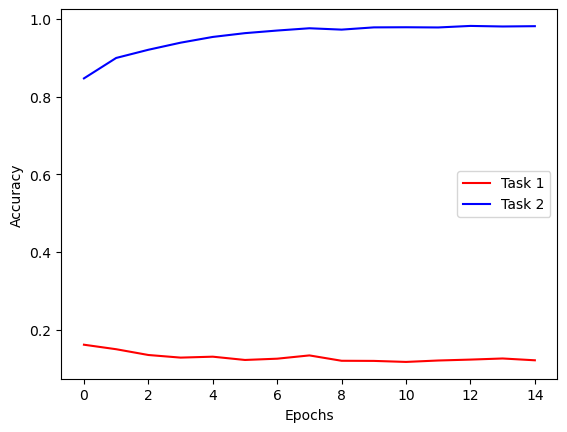


Plotting Accuracy vs Epochs for value of gamma number 0.5



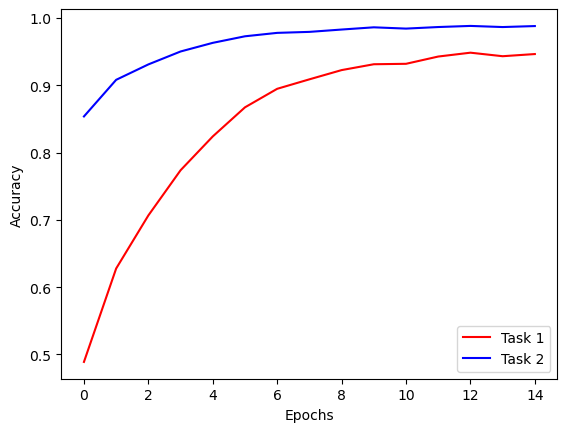


Plotting Accuracy vs Epochs for value of gamma number 1.0



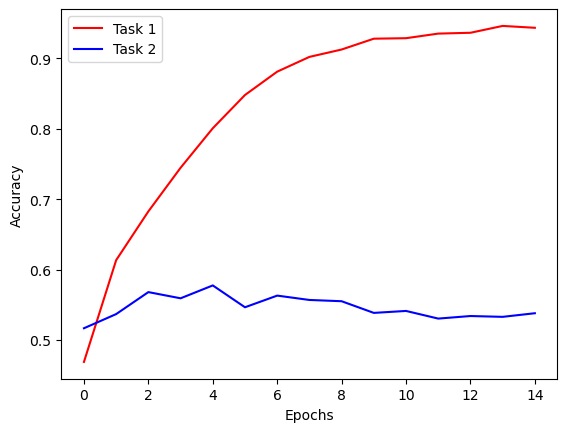

In [12]:
plot_multitask_accuracies(gammas, training_history)

## Test with random test images

### NOTE: the model to be used for predictions is the last model compiles along the code. If no modifications have been done, the modelis the one with gamma = 1

Expected labels:  [0. 0. 0. 0. 0. 1. 0. 0.] [1. 0.]
(1, 32, 32, 3)


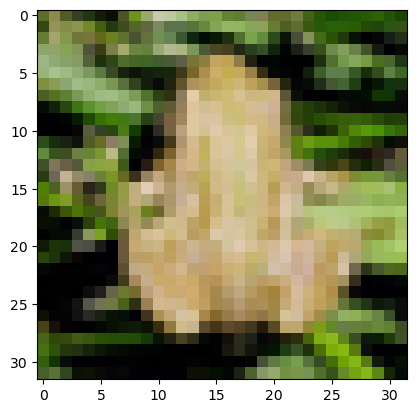

In [13]:
import random

# Pick random image of test data, which will be used to evaluate each task
random_ind = random.randrange(0, x_test.shape[0], 1)
image = x_test[random_ind,:,:,:]
print('Expected labels: ', y_test_1[random_ind], y_test_2[random_ind])
plt.imshow(image)

image = np.expand_dims(image, axis=0)
print(image.shape)


In [14]:
# Get prediction for both tasks, and compare them to the real classes 
# (predictions will be done on the model trained with gamma=0.5)

trained_model = trained_models[2]
for pred in trained_model.predict(image):
    print('Task prediction: ', np.argmax(pred))
# trained_model.predict(image)

1/1 [==============================] - 1s 636ms/step
Task prediction:  5
Task prediction:  1


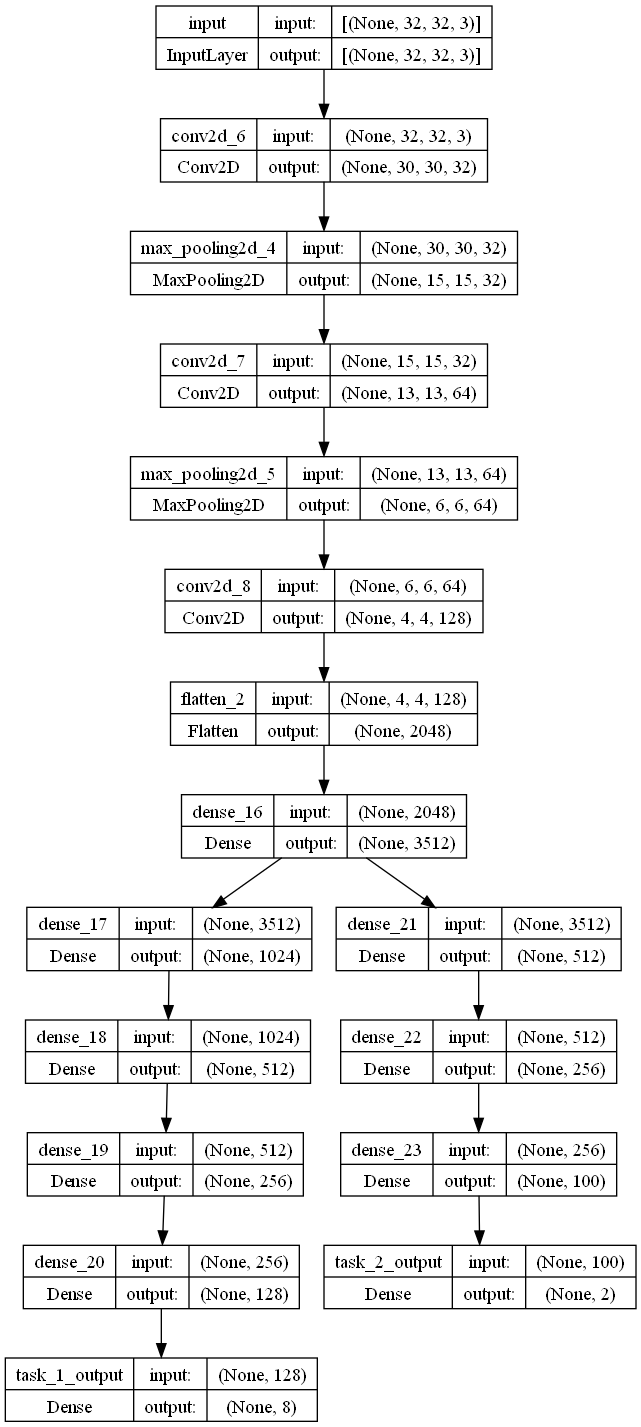

In [19]:
tf.keras.utils.plot_model(trained_model, show_shapes=True)